# 预测性分析

经过了数据探索（数据质量分析、特征分布分析）和数据预处理（数据清洗、集成、变换）之后，终于有了可供分析的数据了。下面将会利用分类与回归算法，对数据进行预测性分析。

分类与回归是机器学习的主要问题。通过学习分类与回归，在遇到新的数据的时候，就可以根据历史数据中蕴含的经验，来对新的数据进行分类或者预测了。一旦知道了未来的趋势，你就会在竞争中获得先机。

就餐饮行业来说：
 * 如何基于菜品历史销售情况，以及节假日、气候和竞争对手等影响因素，对菜品销量进行趋势预测？
 * 如何预测未来一段时间哪些客户会流失，哪些客户最有可能成为VIP客户？
 * 如何预测一种新产品的销售量，以及在哪些种类的客户中会受欢迎？

## 1. 常用的分类算法

 * 回归分析：回归分析是确定预测属性（数值型）与其他变量间相互依赖的定量关系最常用的统计学方法。包括：线性回归、非线性回归、Logistic回归、岭回归、主成分回归、偏最小二乘回归等模型
 * 树型模型：树型模型采用自顶向下的递归方式，在内部节点进行属性值的比较，并根据不同的属性值从该节点向下分支，最终得到的叶节点是学习划分的类。常用的模型包括：决策树、随机森林
 * 人工神经网络：人工神经网络是一种模仿大脑神经网络结构和功能而建立的信息处理系统，表示神经网络的输入与输出变量之间关系的模型，常用的模型包括：感知机、BP神经网络、Softmax、DNN、CNN等
 * 概率模型：概率模型是不确定知识表达和推理领域最有效的理论模型之一，常用的模型包括：贝叶斯网络、朴素贝叶斯
 支持向量机：支持向量机是一种通过某种非线性映射，把低维的非线性可分转化为高维的线性可分，在高维空间进行线性分析的算法。常用模型包括：SVM、线性SVM、SVC

### 1.1 回归分析

回归分析是通过建立模型来研究变量之间相互关系的密切程度、结构状态及进行模型预测的一种有效工具，在工商管理、经济、社会、医学和生物学等领域应用十分广泛。**从19世纪初高斯提出最小二乘估计起**，回归分析的历史已有200多年。

#### Logistic回归分析贷款用户是否可能会违约

Logistic回归常用来解决二分类问题，在征信领域被广泛应用，用来判决一个用户是否可能会违约。

In [9]:
import pandas as pd

filename = '../data/bankloan.xls'
data = pd.read_excel(filename)

data.head()

,年龄,教育,工龄,地址,收入,负债率,信用卡负债,其他负债,违约
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


数据中包含了用户的年龄、教育、工龄、地址、收入、负债率、信用卡负债、其他负债、是否违约。现在来尝试使用Logistic回归算法来学习，并构建模型。

整个过程主要分为两步：
1. 特征分析与选择
2. 训练模型并给出封闭式测试的准确率

In [26]:
x = data.iloc[:, :8].as_matrix()
y = data.iloc[:, 8].as_matrix()

from sklearn.linear_model import LogisticRegression as LR
from sklearn.linear_model import RandomizedLogisticRegression as RLR

rlr = RLR()
rlr.fit(x, y)

print(u'所有特征的重要性评分为：%s' % str(rlr.scores_))
print(u'有效特征为：%s' % ','.join(data.columns[rlr.get_support()]))

所有特征的重要性评分为：[ 0.11   0.07   0.99   0.425  0.     0.995  0.605  0.04 ]
有效特征为：工龄,地址,负债率,信用卡负债


/Users/yingrui/miniconda3/envs/py3/lib/python3.6/site-packages/pandas/core/indexes/base.py:1650: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 9 but corresponding boolean dimension is 8
  result = getitem(key)


In [28]:
selected_features = data[data.columns[rlr.get_support()]].as_matrix()

lr1 = LR()
lr1.fit(x, y)
print(u'模型的平均正确率为：%s' % lr1.score(x, y))

lr2 = LR()
lr2.fit(selected_features, y)

print(u'经过特征筛选后模型的平均正确率为：%s' % lr2.score(selected_features, y))

模型的平均正确率为：0.805714285714
经过特征筛选后模型的平均正确率为：0.814285714286


/Users/yingrui/miniconda3/envs/py3/lib/python3.6/site-packages/pandas/core/indexes/base.py:1650: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 9 but corresponding boolean dimension is 8
  result = getitem(key)


#### 利用决策树来预测天气对餐馆销量的影响

决策树是一种树状结构，它的每一个叶节点对应着一个分类，非叶节点对应着在某个属性上的划分，根据样本在该属性上的不同取值将其划分成若干个子集。

决策树模型训练的关键，在于如何决策树上某个属性划分的最佳参数。例如当年龄小于20岁，都是高风险客户，为什么是20，而不是21？

常见的决策树算法分类
1. ID3算法：其核心是在决策树的各级节点上，使用信息增益方法作为属性的选择标准，来帮助确定生成每个节点时所应采用的合适属性
2. C4.5算法：相对ID3算法的重要改进是使用信息增益**率**来选择节点属性。ID3算法只适用于离散的描述属性，而C4.5算法既能够处理离散的描述属性，也可以处理连续的描述属性
3. CART算法：CART决策树是一种十分有效的非参数分类和回归方法，通过构建树、修剪树、评估树来构建一个二叉树。当预测值是连续变量时，该树为回归树；当预测值是分类变量，该树为分类树。

**互信息**：互信息越大，则表示两个随机变量越相关。如果特征字段F1=X1和预测值Class=Y1的互信息最大，那么第一个分叉是否应该用F1是否等于X1来判断呢？——参考《统计自然语言处理》中信息论基础部分

In [29]:
filename = '../data/sales_data.xls'
data = pd.read_excel(filename, index_col=u'序号')

data.head()

,天气,是否周末,是否有促销,销量
序号,,,,
1,坏,是,是,高
2,坏,是,是,高
3,坏,是,是,高
4,坏,否,是,高
5,坏,是,是,高


数据中包含有4个特征：天气、是否周末、是否有促销、销量。这些特征都是离散型的，所以可以使用ID3算法来训练决策树模型

In [78]:
# 如何绘制混淆矩阵
import matplotlib.pyplot as plt
import numpy as np
import itertools
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

模型的准确率是: 0.764706
模型的召回率是: 0.777778
模型的F1是: 0.777778
Normalized confusion matrix


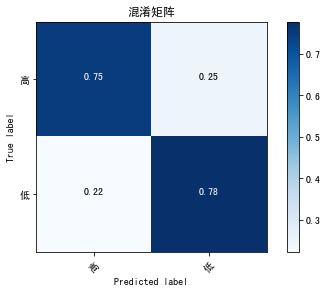

In [79]:
data[data == u'高'] = 1
data[data == u'是'] = 1
data[data == u'好'] = 1
data[data != 1] = 0

x = data.iloc[:,:3].as_matrix().astype(int)
y = data.iloc[:,3].as_matrix().astype(int)

from sklearn.tree import DecisionTreeClassifier as DTC
dtc = DTC(criterion='entropy')
dtc.fit(x, y)

y_pred = dtc.predict(x)

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

print(u'模型的准确率是: %f' % accuracy_score(y, y_pred))
print(u'模型的召回率是: %f' % recall_score(y, y_pred))
print(u'模型的F1是: %f' % f1_score(y, y_pred))
cnf_matrix = confusion_matrix(y, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[u'高', u'低'], normalize=True, title='混淆矩阵')
plt.show()

In [80]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

with open("tree.dot", 'w') as f:
    f = export_graphviz(dtc, feature_names = data.columns, out_file = f)
    
#with open("tree.dot", 'r') as f:
#    print(f.read())

#### 安装graphviz来可视化决策树

安装了Graphviz之后，可以用命令行来将dot文件转成png图片
```shell
dot -Tpng tree.dot -o tree.png
```

## 作业

1. 利用神经网络来预测天气对餐馆销量的影响

2. 利用SVM或神经网络算法对Iris（鸢尾属植物）进行分类。数据文件位置../data/iris.csv

2. 利用决策树对员工满意度调查报告进行分析。数据文件位置../data/labor.csv

## 参考资料
1. Scikit-learn Algorithm Cheat Sheet
![scikit-learn algorithm cheat sheet](./drop_shadows_background.png "scikit-learn algorithm cheat sheet")